# Проектная работа по Статистике

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest
from scipy.stats import f_oneway, levene
from scipy.stats import chi2_contingency

import warnings

warnings.filterwarnings("ignore")

In [2]:
df_clientsorders = pd.read_csv("../datasets/clients_orders.csv")
df_courierseducation = pd.read_csv("../datasets/couriers_education.csv")
df_timescourierstest = pd.read_csv("../datasets/times_couriers_test.csv")
df_timescourierscontrol = pd.read_csv("../datasets/times_couriers_control.csv")

In [3]:
df_clientsorders.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_courierseducation.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_timescourierstest.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_timescourierscontrol.drop(labels="Unnamed: 0", axis=1, inplace=True)

## Задание 1.

Менеджер логистической компании решил провести АБ-тест, выбрав в качестве метрики время доставки курьерами посылок. Для контрольной группы курьеров оставили предыдущий интерфейс навигации в приложении, а для тестовой группы внедрили новую опцию, позволяющую комбинировать несколько видов транспорта.  
Полученные результаты времени доставки в минутах для тестовой и контрольной групп представлены в csv-файлах times_couriers_control.csv и times_couriers_test.csv.  
Проверьте гипотезу менеджера о том, что внедрённая опция приложения уменьшила время доставки.

*Подсказка: это независимые выборки.*

<font color="blue">Посмотрим на выборки.</font>

In [4]:
df_timescourierstest.describe()

,time
count,472.000000
mean,15.390508
std,5.686440
min,3.530000
25%,10.520000
50%,15.215000
75%,20.342500
max,26.460000


In [5]:
df_timescourierstest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    472 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [6]:
df_timescourierstest.isnull().sum()

time    0
dtype: int64

In [7]:
df_timescourierscontrol.describe()

,time
count,472.000000
mean,14.220763
std,5.772502
min,2.300000
25%,9.647500
50%,13.735000
75%,18.900000
max,29.040000


In [8]:
df_timescourierscontrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    472 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [9]:
df_timescourierscontrol.isnull().sum()

time    0
dtype: int64

In [10]:
df_timescourierstest

,time
0,12.69
1,13.51
2,16.19
3,9.77
4,8.81
...,...
467,14.10
468,23.18
469,9.98
470,15.26


In [11]:
df_timescourierscontrol

,time
0,10.88
1,14.11
2,8.51
3,6.43
4,24.32
...,...
467,16.86
468,19.50
469,8.15
470,7.80



### <u>Определим гипотезы:</u>
* Нулевая гипотеза (H0): нет значимой разницы в среднем времени доставки между группами.
* Альтернативная гипотеза (H1): среднее время доставки в тестовой группе меньше, чем в контрольной группе.

<u>Т.к. выборки независимые, то можно применить t-критерий Стьюдента для независимых выборок</u>

t-критерий Стьюдента для независимых выборок применяется для сравнения средних значений двух независимых между собой выборок.

**Условия применения:**
1. Сравниваемые значения не составляют пару коррелирующих значений
2. Распределение признаков в каждой выборке соответствует нормальному распределению  
3. Дисперсии признака в выборках примерно равны 

<font color="blue"><u>1. Проверим зависимость выборок с помощью коэффициента корреляции Пирсона.</u></font>

In [12]:
pearsonr(df_timescourierstest["time"], df_timescourierscontrol["time"])

PearsonRResult(statistic=np.float64(0.04717249285160774), pvalue=np.float64(0.3064493072523685))

<font color="blue">*Вывод:  
0,01 < r ≤ 0,29 – слабая положительная связь  
p-уровень > 0,05, значит связь между переменными является статистически не значимой.*</font>

<font color="blue"><u>2. Проверим соответствуют ли данные нормальному распределению. </u></font>

Способ 1: создание гистограммы (и боксплота для проверки выбросов)

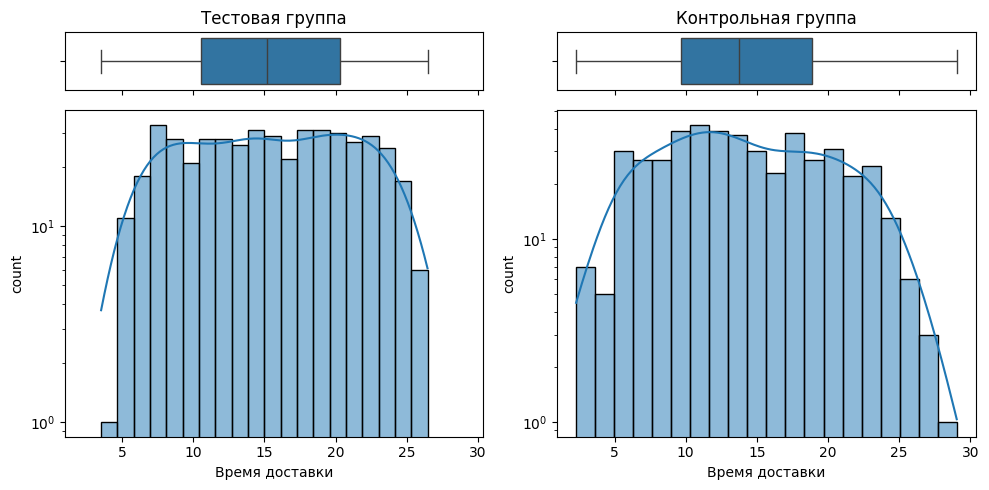

In [13]:
fig, axes = plt.subplots(
    2, 2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(10, 5)
)

ax_box1, ax_box2, ax_hist1, ax_hist2 = axes.flatten()

sns.boxplot(x=df_timescourierstest["time"], ax=ax_box1)
sns.boxplot(x=df_timescourierscontrol["time"], ax=ax_box2)

ax_box1.set(xlabel="")
ax_box1.set_title("Тестовая группа")
ax_box2.set(xlabel="")
ax_box2.set_title("Контрольная группа")

sns.histplot(data=df_timescourierstest, x="time", bins=20, kde=True, ax=ax_hist1)
sns.histplot(data=df_timescourierscontrol, x="time", bins=20, kde=True, ax=ax_hist2)

ax_hist1.set_yscale("log")
ax_hist1.set(xlabel="Время доставки")
ax_hist1.set(ylabel="count")

ax_hist2.set_yscale("log")
ax_hist2.set(xlabel="Время доставки")
ax_hist2.set(ylabel="count")

plt.tight_layout()

plt.show()

*Выбросов у обеих выборок не обнаружено.
Гистограммы обеих выборок примерно напоминают колоколообразную форму, что может быть признаком нормального распределения.*

Способ 2: создать график QQ

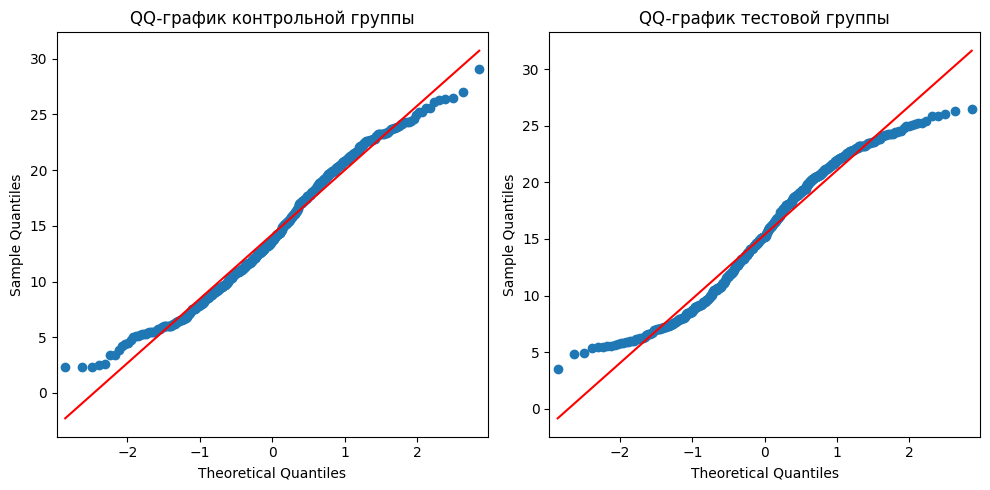

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df_timescourierscontrol["time"], line="s", ax=axes[0])
axes[0].set_title("QQ-график контрольной группы")

qqplot(df_timescourierstest["time"], line="s", ax=axes[1])
axes[1].set_title("QQ-график тестовой группы")

plt.tight_layout()

plt.show()

*Точки на QQ-графике и контрольной и тестовой выборок близко распололжены к прямой линии, что говорит о возможности нормального распределения данных.*

Способ 3: выполнить тест Колмогорова-Смирнова

In [15]:
ks_stat_control, ks_p_control = kstest(
    df_timescourierscontrol["time"],
    "norm",
    args=(
        np.mean(df_timescourierscontrol["time"]),
        np.std(df_timescourierscontrol["time"]),
    ),
)
ks_stat_test, ks_p_test = kstest(
    df_timescourierstest["time"],
    "norm",
    args=(np.mean(df_timescourierstest["time"]), np.std(df_timescourierstest["time"])),
)

print(
    f"Тест Колмогорова-Смирнова (контрольная группа): статистика={ks_stat_control:.4f}, p-значение={ks_p_control:.4f}"
)
print(
    f"Тест Колмогорова-Смирнова (тестовая группа): статистика={ks_stat_test:.4f}, p-значение={ks_p_test:.4f}"
)

Тест Колмогорова-Смирнова (контрольная группа): статистика=0.0508, p-значение=0.1689
Тест Колмогорова-Смирнова (тестовая группа): статистика=0.0648, p-значение=0.0363


*p-значение у обеих выборок больше 0,05, значит нет оснований отвергать гипотезу о том, что данные распределены нормально.*

**Важно:** Ни один тест не может с полной уверенностью сказать, что данные распределены нормально. Все методы являются приближенными. 

<font color="blue">*Вывод:
Можем считать, что данные в обеих выборках распределены нормально.* </font>

<font color="blue"><u> 3. Проверка равенства дисперсий.</u></font> 

In [16]:
levene_statistic, p_value = levene(
    df_timescourierscontrol["time"], df_timescourierstest["time"]
)

print(f"Тест Левене: статистика={levene_statistic:.4f}, p-значение={p_value:.4f}")

Тест Левене: статистика=0.0302, p-значение=0.8620


<font color="blue">*Вывод:
Т.к. p-значение больше 0.05, то нет оснований отвергать гипотезу о том, что дисперсии выборок равны.* </font>

Итак, теперь можно применить t-критерий.

In [17]:
alpha = 0.05  # уровень статистической значимости

results = stats.ttest_ind(
    df_timescourierstest["time"], df_timescourierscontrol["time"], alternative="less"
)  # less / greater / two-sided

print("p-значение:", results.pvalue)
print("t-статистика:", results.statistic)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9991180560045553
t-статистика: 3.1363225525939744
Не получилось отвергнуть нулевую гипотезу


<font color="blue"><u>Вывод:
Отвергаем альтернативную гипотезу о том, что новая опция приложения уменьшила время доставки. </font> </u>

## Задание 2
В этой же компании с 1 мая часто заказывающим клиентам предоставили скидку, действующую на все заказы до конца календарного месяца, если в этом месяце клиент уже сделал четыре заказа (то есть начиная с пятого заказа).  
В файле clients_orders.csv представлена информация о количестве заказов, которые одни и те же клиенты сделали в апреле и мае.  
Проверьте гипотезу о том, что клиенты стали делать больше заказов после введения скидки.

*Подсказка: это зависимая (парная) выборка.*

<font color="blue">Посмотрим на выборки.</font>

In [18]:
df_clientsorders

,orders_april,orders_may
0,28,33
1,20,18
2,22,28
3,29,21
4,23,27
...,...,...
69,31,17
70,16,34
71,28,16
72,25,19


In [19]:
df_clientsorders.describe()

,orders_april,orders_may
count,74.000000,74.000000
mean,21.851351,24.108108
std,5.413536,5.653384
min,12.000000,14.000000
25%,18.000000,19.250000
50%,22.000000,23.500000
75%,26.750000,28.000000
max,31.000000,35.000000


In [20]:
df_clientsorders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   orders_april  74 non-null     int64
 1   orders_may    74 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [21]:
df_clientsorders.isnull().sum()

orders_april    0
orders_may      0
dtype: int64

### <u>Определим гипотезы:</u>
* Нулевая гипотеза (H0): нет значимой разницы в среднем количестве заказов до и после введения скидки.
* Альтернативная гипотеза (H1): среднее количество заказов после введения скидки больше, чем до этого.

<u>Т.к. выборки зависимые, то можно применить t-критерий Стьюдента для зависимых выборок</u>

t-критерий Стьюдента для зависимых выборок применяется для сравнения средних значений двух зависимых между собой выборок.

**Условия применения:**

1. Сравниваемые значения составляют пару коррелирующих значений
2. Распределение признаков в каждой выборке соответствует нормальному распределению

Альтернатива:  
* непараметрический T-критерий Вилкоксона (если распределение в выборке не нормальное)
* t-критерий Стьюдента для независимых выборок (если значения не составляют пару коррелирующих значений)

<font color="blue"><u>1. Проверим зависимость выборок с помощью коэффициента корреляции Пирсона.</u></font>

In [22]:
pearsonr(df_clientsorders["orders_april"], df_clientsorders["orders_may"])

PearsonRResult(statistic=np.float64(0.10213690387986617), pvalue=np.float64(0.38653166899978986))

<font color="blue">*Вывод:  
0,01 < r ≤ 0,29 – слабая положительная связь,  
p-уровень > 0,05, значит связь между переменными является статистически не значимой.*</font>

<font color="blue"><u>2. Проверим соответствуют ли данные нормальному распределению. </u></font>

Способ 1: создание гистограммы (и боксплота для проверки выбросов)

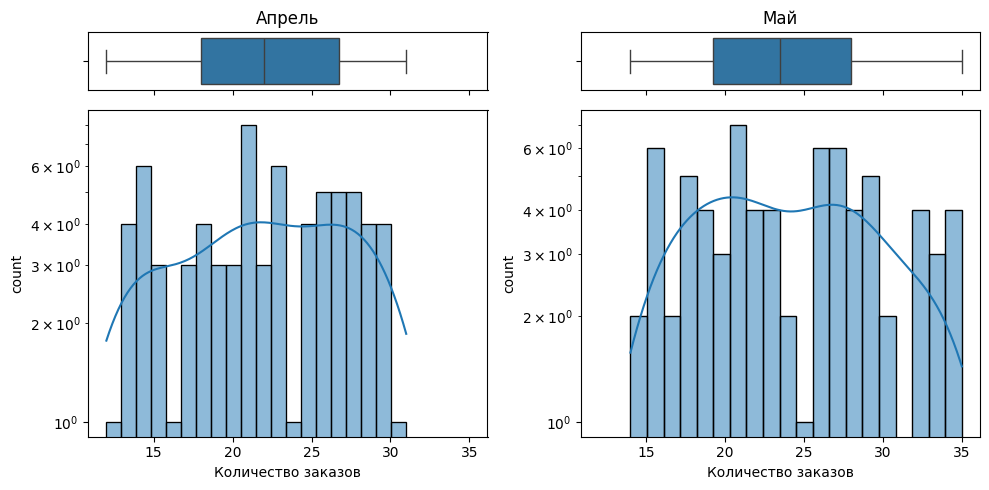

In [23]:
fig, axes = plt.subplots(
    2, 2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(10, 5)
)

ax_box1, ax_box2, ax_hist1, ax_hist2 = axes.flatten()

sns.boxplot(x=df_clientsorders["orders_april"], ax=ax_box1)
sns.boxplot(x=df_clientsorders["orders_may"], ax=ax_box2)

ax_box1.set(xlabel="")
ax_box1.set_title("Апрель")
ax_box2.set(xlabel="")
ax_box2.set_title("Май")

sns.histplot(data=df_clientsorders, x="orders_april", bins=20, kde=True, ax=ax_hist1)
sns.histplot(data=df_clientsorders, x="orders_may", bins=20, kde=True, ax=ax_hist2)

ax_hist1.set_yscale("log")
ax_hist1.set(xlabel="Количество заказов")
ax_hist1.set(ylabel="count")

ax_hist2.set_yscale("log")
ax_hist2.set(xlabel="Количество заказов")
ax_hist2.set(ylabel="count")

plt.tight_layout()

plt.show()

*Выбросов у обеих выборок не обнаружено.
Гистограммы обеих выборок примерно напоминают колоколообразную форму, что может быть признаком нормального распределения.*

Способ 2: создать график QQ

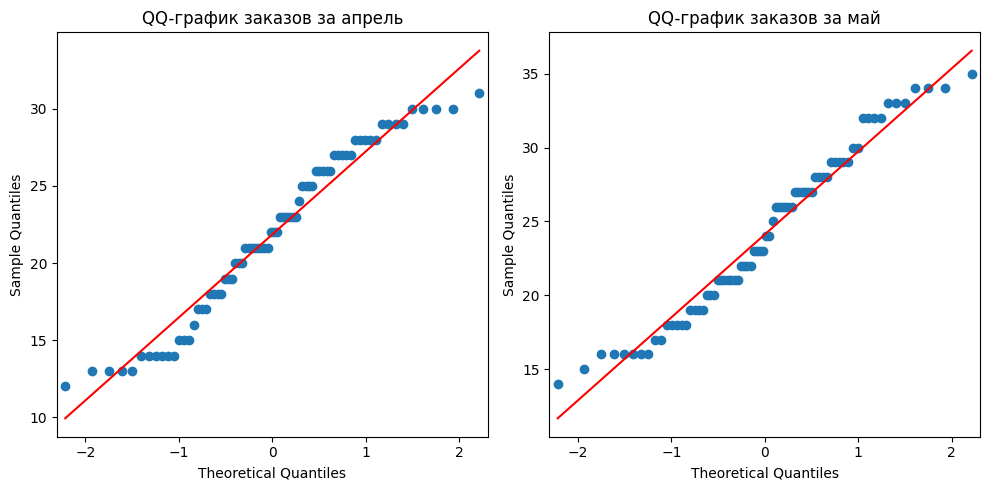

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df_clientsorders["orders_april"], line="s", ax=axes[0])
axes[0].set_title("QQ-график заказов за апрель")

qqplot(df_clientsorders["orders_may"], line="s", ax=axes[1])
axes[1].set_title("QQ-график заказов за май")

plt.tight_layout()

plt.show()

*Точки на QQ-графике и контрольной и тестовой выборок близко распололжены к прямой линии, что говорит о возможности нормального распределения данных.*

- **Тесты Шапиро-Уилка и Колмогорова-Смирнова:** 
   - Если p-значение больше 0.05, то нет оснований отвергать гипотезу о том, что данные распределены нормально.
   - Если p-значение меньше 0.05, то есть основания отвергать гипотезу о нормальном распределении.

Способ 3: выполнить тест Колмогорова-Смирнова

In [25]:
ks_stat_april, ks_p_april = kstest(
    df_clientsorders["orders_april"],
    "norm",
    args=(
        np.mean(df_clientsorders["orders_april"]),
        np.std(df_clientsorders["orders_april"]),
    ),
)
ks_stat_may, ks_p_may = kstest(
    df_clientsorders["orders_may"],
    "norm",
    args=(
        np.mean(df_clientsorders["orders_may"]),
        np.std(df_clientsorders["orders_may"]),
    ),
)

print(
    f"Тест Колмогорова-Смирнова (апрель): статистика={ks_stat_april:.4f}, p-значение={ks_p_april:.4f}"
)
print(
    f"Тест Колмогорова-Смирнова (май): статистика={ks_stat_may:.4f}, p-значение={ks_p_may:.4f}"
)

Тест Колмогорова-Смирнова (апрель): статистика=0.1041, p-значение=0.3727
Тест Колмогорова-Смирнова (май): статистика=0.1019, p-значение=0.3986


*p-значение у обеих выборок больше 0,05, значит нет оснований отвергать гипотезу о том, что данные распределены нормально.*

<font color="blue">*Вывод:
Можем считать, что данные в обеих выборках распределены нормально.* </font>

Итак, теперь можно применить t-критерий.

In [26]:
alpha = 0.05  # уровень статистической значимости

results = stats.ttest_rel(
    df_clientsorders["orders_april"], df_clientsorders["orders_may"], alternative="less"
)  # less / greater/ two-sided

print("p-значение:", results.pvalue)
print("t-статистика:", results.statistic)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00538333571008088
t-статистика: -2.6173307841882494
Отвергаем нулевую гипотезу


<font color="blue"><u>Вывод:
Отвергаем нулевую гипотезу о том, что нет значимой разницы в среднем количестве заказов до и после введения скидки. </font> </u>

## Задание 3
В файле couriers_education.csv представлена анонимизированная информация о курьерах компании: образование ( education ) и количество лет работы в компании ( experience ).

Переменная education принимает значения:  
NS — no school — нет аттестата об окончании школы  
MS — middle school — закончены 9 классов школы  
S — school — среднее образование: закончена средняя школа  
SSE — secondary special education — среднее специальное образование (ПТУ /колледж)  
HE — higher education — высшее образование   

Переменная experience принимает значения:
0-1 — до одного года работы в компании  
1-3 — от одного до трёх лет работы  
3-5 — от трёх до пяти лет работы  
5- — от пяти лет работы  

Проверьте гипотезу о том, что стаж работы в компании зависит от уровня образования.


<font color="blue">Посмотрим на выборки.</font>

In [27]:
df_courierseducation

,education,experience
0,MS,0-1
1,S,0-1
2,S,0-1
3,S,0-1
4,HE,3-5
...,...,...
462,NS,5-
463,S,0-1
464,S,3-5
465,SSE,3-5


In [28]:
df_courierseducation.describe()

,education,experience
count,467,467
unique,5,4
top,S,0-1
freq,212,179


In [29]:
df_courierseducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   education   467 non-null    object
 1   experience  467 non-null    object
dtypes: object(2)
memory usage: 7.4+ KB


### <u>Определим гипотезы:</u>
* Нулевая гипотеза (H0): нет значимой корреляции между образованием и стажем работы в компании.
* Альтернативная гипотеза (H1): стаж работы в компании зависит от уровня образования.

Создадим таблицу сопряженности

In [30]:
pd.crosstab(df_courierseducation["education"], df_courierseducation["experience"])

experience,0-1,1-3,3-5,5-
education,,,,
HE,32,32,22,20
MS,30,14,3,11
NS,13,15,7,6
S,85,62,48,17
SSE,19,14,10,7


Рассчитаем статистику хи-квадрат.

In [31]:
table = pd.crosstab(
    df_courierseducation["education"], df_courierseducation["experience"]
)
res = chi2_contingency(table)
print("хи-квадрат стастистика:", res.statistic)
print("p-value:", res.pvalue)
print("степеней свободы:", res.dof)
print("рассчитанные ожидаемые значения:\n", res.expected_freq)

хи-квадрат стастистика: 22.507947679669225
p-value: 0.032205915366036585
степеней свободы: 12
рассчитанные ожидаемые значения:
 [[40.62955032 31.09635974 20.42826552 13.84582441]
 [22.23126338 17.01498929 11.17773019  7.57601713]
 [15.71520343 12.02783726  7.90149893  5.35546039]
 [81.25910064 62.19271949 40.85653105 27.69164882]
 [19.16488223 14.66809422  9.6359743   6.53104925]]


In [32]:
print("\nТаблица ожидаемых частот:")
print(pd.DataFrame(res.expected_freq, columns=table.columns, index=table.index))

alpha = 0.05  # Уровень значимости
if res.pvalue < alpha:
    print(
        "\nОтвергаем нулевую гипотезу: стаж работы в компании зависит от уровня образования."
    )
else:
    print(
        "\nНе отвергаем нулевую гипотезу: нет достаточных оснований утверждать, что стаж работы в компании зависит от уровня образования."
    )


Таблица ожидаемых частот:
experience        0-1        1-3        3-5         5-
education                                             
HE          40.629550  31.096360  20.428266  13.845824
MS          22.231263  17.014989  11.177730   7.576017
NS          15.715203  12.027837   7.901499   5.355460
S           81.259101  62.192719  40.856531  27.691649
SSE         19.164882  14.668094   9.635974   6.531049

Отвергаем нулевую гипотезу: стаж работы в компании зависит от уровня образования.


<font color="blue"><u>Вывод:
Отвергаем нулевую гипотезу: стаж работы в компании зависит от уровня образования. </font> </u>

## Задание 4 (дополнительное)
Постройте 95%-е доверительные интервалы по выборкам из задания 1 для среднего времени доставки курьерами, использующими и не использующими новую опцию комбинирования нескольких видов транспорта в приложении.

In [33]:
# Тестовая группа
# Вычисление стандартного отклонения, размера выборки
std_test_time = np.std(df_timescourierstest["time"], ddof=1)
n = len(df_timescourierstest["time"])
mean_test_time = df_timescourierstest["time"].mean()

# Вычисление и округление доверительного интервала
interval_test = stats.norm.interval(
    0.95, loc=mean_test_time, scale=std_test_time / np.sqrt(n)
)
interval_test = (interval_test[0], interval_test[1])

# Контрольная группа
# Вычисление стандартного отклонения, размера выборки
std_control_time = np.std(df_timescourierscontrol["time"], ddof=1)
n = len(df_timescourierscontrol["time"])
mean_control_time = df_timescourierscontrol["time"].mean()

# Вычисление доверительного интервала
interval_control = stats.norm.interval(
    0.95, loc=mean_control_time, scale=std_control_time / np.sqrt(n)
)
interval_control = (interval_control[0], interval_control[1])

print(
    f"95% Доверительный интервал для среднего времени доставки в тестовой группе: {interval_test}"
)
print(
    f"95% Доверительный интервал для среднего времени доставки в контрольной группе: {interval_control}"
)

95% Доверительный интервал для среднего времени доставки в тестовой группе: (np.float64(14.877508247205094), np.float64(15.903508701947446))
95% Доверительный интервал для среднего времени доставки в контрольной группе: (np.float64(13.699998472120784), np.float64(14.741526951608025))


In [50]:
def make_plot(param, alph, nsig=4, nbins=25):
    title_axis = "Визуализация совокупности данных о времени обработки заказов"
    fig, axes = plt.subplots(figsize=[8, 8])
    axes.set_title(title_axis, fontsize=14)
    axes.set_xlabel("Time(hours)", fontsize=16)
    mean_t, sigma = stats.norm.fit(param)
    axes.hist(param, nbins, density=True, color="coral", alpha=0.5)
    xmin, xmax = mean_t - nsig * sigma, mean_t + nsig * sigma
    xdat = np.linspace(xmin, xmax, 100)
    pdf_dat = stats.norm(mean_t, sigma).pdf(xdat)
    axes.plot(xdat, pdf_dat, color="cornflowerblue")
    # Построение доверительного интервала
    std_mean = param.std(ddof=1) / np.sqrt(param.count())
    left, right = stats.norm.interval(1 - alph, loc=mean_t, scale=std_mean)
    for bord in [left, right]:
        y_max = plt.ylim()[1] * 0.8
        axes.axvline(bord, color="cadetblue", linestyle="dashed", lw=2)
        if bord == left:
            axes.text(mean_t - sigma, y_max, round(bord, 2), color="darkslategrey")
        else:
            axes.text(mean_t + sigma / 2, y_max, round(bord, 2), color="darkslategrey")
    xfill = np.linspace(left, right)
    yfill = stats.norm(mean_t, sigma).pdf(xfill)
    axes.fill_between(xfill, 0, yfill, color="cadetblue", alpha=0.7)

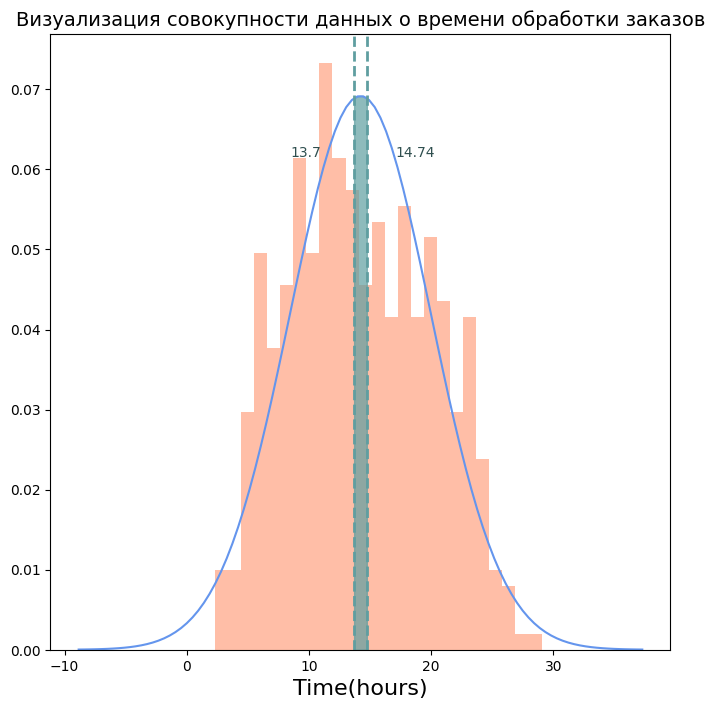

In [51]:
make_plot(df_timescourierscontrol["time"], alph=0.05, nsig=4, nbins=25)

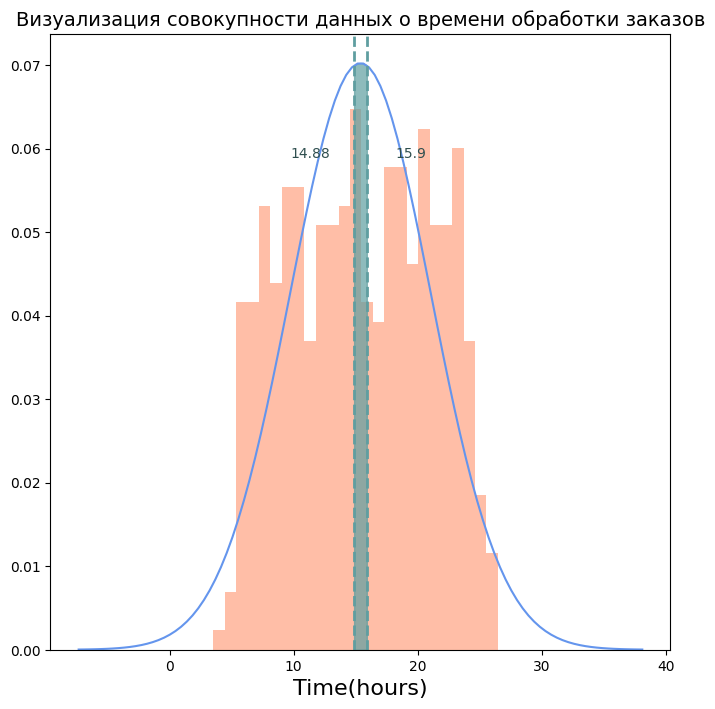

In [52]:
make_plot(df_timescourierstest["time"], alph=0.05, nsig=4, nbins=25)

Функция для вычисления доверительных интервалов

In [64]:
def make_stat(param, alph, method):
    if method == "assympt":
        z = stats.norm.ppf(1 - alph / 2)
        mean_s = param.mean()
        var_s = param.var(ddof=1)
        n = param.count()
        left_s = mean_s - z * np.sqrt(var_s / n)
        right_s = mean_s + z * np.sqrt(var_s / n)
        print(
            f"Доверительный интервал среднего времени доставки (вычислено вручную): [{round(left_s, 3)}, {round(right_s, 3)}], ширина интервала: [{round((right_s - left_s), 3)}]"
        )
        sigma = param.std(ddof=1) / np.sqrt(n)
        left, right = stats.norm.interval(1 - alph, loc=mean_s, scale=sigma)
        print(
            f"Доверительный интервал среднего времени доставки (с пом. библиотеки): [{round(left, 3)}, {round(right, 3)}], ширина интервала: [{round((right - left), 3)}]"
        )
    if method == "precize":
        n = param.count()
        stud = stats.t(n - 1)
        t = stud.ppf(1 - alph / 2)
        mean_p = param.mean()
        var_p = param.var(ddof=1)
        left_p = mean_p - t * np.sqrt(var_p / n)
        right_p = mean_p + t * np.sqrt(var_p / n)
        print(
            f"Доверительный интервал среднего времени доставки (вычислено вручную): [{round(left_p, 3)}, {round(right_p, 3)}], ширина интервала: [{round((right_p - left_p), 3)}]"
        )
        sigma = param.std(ddof=1) / np.sqrt(n)
        left, right = stats.t.interval(1 - alph, df=(n - 1), loc=mean_p, scale=sigma)
        print(
            f"Доверительный интервал среднего времени доставки (с пом. библиотеки): [{round(left, 3)}, {round(right, 3)}], ширина интервала: [{round((right - left), 3)}]"
        )

Рассчитаем асимптотический интервал для тестовой группы:

In [57]:
make_stat(df_timescourierstest["time"], 0.1, "assympt")

Доверительный интервал среднего времени доставки (вычислено вручную): [14.96, 15.821], ширина интервала: [0.861]
Доверительный интервал среднего времени доставки (с пом. библиотеки): [14.96, 15.821], ширина интервала: [0.861]


Рассчитаем точный интервал для тестовой группы:

In [65]:
make_stat(df_timescourierstest["time"], 0.1, "precize")

Доверительный интервал среднего времени доставки (вычислено вручную): [14.959, 15.822], ширина интервала: [0.863]
Доверительный интервал среднего времени доставки (с пом. библиотеки): [14.959, 15.822], ширина интервала: [0.863]


Рассчитаем асимптотический интервал для контрольной группы:

In [59]:
make_stat(df_timescourierscontrol["time"], 0.1, "assympt")

Доверительный интервал среднего времени доставки (вычислено вручную): [13.784, 14.658], ширина интервала: [0.874]
Доверительный интервал среднего времени доставки (с пом. библиотеки): [13.784, 14.658], ширина интервала: [0.874]


Рассчитаем точный интервал для контрольной группы:

In [66]:
make_stat(df_timescourierscontrol["time"], 0.1, "precize")

Доверительный интервал среднего времени доставки (вычислено вручную): [13.783, 14.659], ширина интервала: [0.876]
Доверительный интервал среднего времени доставки (с пом. библиотеки): [13.783, 14.659], ширина интервала: [0.876]


Т.к. распределение для тестовой группы не совсем соответствует нормальному распределению, можно попробовать использовать бутстреп метод оценки доверительных интервалов для среднего.

Создание выборки:

(array([0.00519984, 0.02183933, 0.06031816, 0.13623584, 0.27559159,
        0.45758604, 0.77477636, 1.20740316, 1.37483806, 1.46323536,
        1.42995637, 1.24796193, 0.8392544 , 0.56574274, 0.29743093,
        0.15911515, 0.04679857, 0.02391927, 0.00831975, 0.00415987]),
 array([14.46353814, 14.55969492, 14.65585169, 14.75200847, 14.84816525,
        14.94432203, 15.04047881, 15.13663559, 15.23279237, 15.32894915,
        15.42510593, 15.52126271, 15.61741949, 15.71357627, 15.80973305,
        15.90588983, 16.00204661, 16.09820339, 16.19436017, 16.29051695,
        16.38667373]),
 <BarContainer object of 20 artists>)

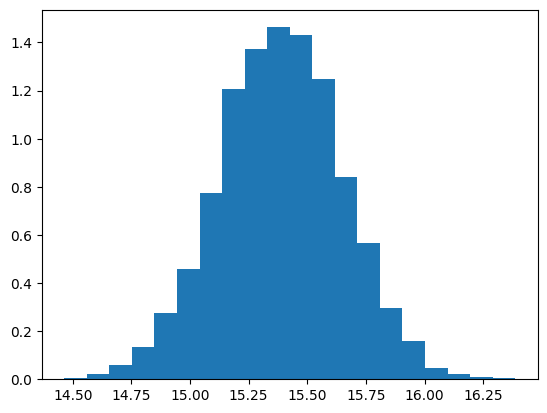

In [68]:
def create_bootstrap_sample(param, n_sample=1000):
    n = param.count()
    sample = np.random.choice(param, size=(n, n_sample), replace=True)
    if n_sample == 1:
        sample = sample.T[0]
    return sample


bs_data = create_bootstrap_sample(df_timescourierstest["time"], n_sample=10000)
# bs_data = create_bootstrap_sample(df_timescourierscontrol['time'], n_sample=10000)
bs_mean = np.mean(bs_data, axis=0)
plt.hist(bs_mean, bins=20, density=True)

Процентильный доверительный интервал (Эфрон):

In [69]:
alpha = 0.1
left = np.quantile(bs_mean, alpha / 2)
right = np.quantile(bs_mean, 1 - alpha / 2)
print(
    f"Доверительный интервал среднего времени доставки (по процентилям): [{round(left, 3)}, {round(right, 3)}], ширина интервала: [{round((right - left), 3)}]"
)

Доверительный интервал среднего времени доставки (по процентилям): [14.95, 15.815], ширина интервала: [0.864]


Доверительный интервал Холла для центрированного значения (наиболее оптимальный из-за "обрезанного" края распределения):

In [70]:
data_mean = np.mean(df_timescourierstest["time"])
# data_mean = np.mean(df_timescourierscontrol['time'])
mean_dif = np.mean(bs_data - data_mean, axis=0)
left = data_mean - np.quantile(mean_dif, 1 - alpha / 2)
right = data_mean - np.quantile(mean_dif, alpha / 2)
print(
    f"Доверительный интервал среднего времени доставки (Холл): [{round(left, 3)}, {round(right, 3)}], ширина интервала: [{round((right - left), 3)}]"
)

Доверительный интервал среднего времени доставки (Холл): [14.966, 15.831], ширина интервала: [0.864]


Т-процентильный доверительный интервал:

In [71]:
data_mean = np.mean(df_timescourierstest['time'])
data_std = np.std(df_timescourierstest['time'])
# data_mean = np.mean(df_timescourierscontrol['time'])
# data_std = np.std(df_timescourierscontrol['time'])
bs_t = np.mean(bs_data - data_mean, axis=0)/np.std(bs_data,axis=0)
left = data_mean - np.quantile(bs_t, 1 - alpha/2)/data_std
right = data_mean - np.quantile(bs_t, alpha/2)/data_std
print(
    f"Доверительный интервал среднего времени доставки (Т-процентильный): [{round(left, 3)}, {round(right, 3)}], ширина интервала: [{round((right - left), 3)}]"
)

Доверительный интервал среднего времени доставки (Т-процентильный): [15.377, 15.404], ширина интервала: [0.027]
